In [1]:
import dask
import dask_awkward as dak
from coffea.dataset_tools import preprocess
from distributed import Client
from matplotlib import pyplot as plt

import egamma_tnp
from egamma_tnp import TagNProbeFromNTuples
from egamma_tnp.plot import plot_efficiency

In [2]:
fileset = {
    "Run2023D": {"files": {"tnptuples/data_EGamma_Run2023D.root": "tnpEleTrig/fitter_tree"}},
    "Run2024C": {
        "files": {"tnptuples/data_EGamma01_Run2024C.root": "tnpEleTrig/fitter_tree"},
    },
}

fileset_available, fileset_updated = preprocess(fileset, step_size=500_000, skip_bad_files=True)

In [3]:
hlt_paths = {
    "Ele30": "passHltEle30WPTightGsf",
    "Ele32": "passHltEle32WPTightGsf",
    "Ele115": "passHltEle115CaloIdVTGsfTrkIdTGsf",
    "Ele135": "passHltEle135CaloIdVTGsfTrkIdTGsf",
    "Ele23Ele12Leg1": "passHltEle23Ele12CaloIdLTrackIdLIsoVLLeg1L1match",
    "Ele23Ele12Leg2": "passHltEle23Ele12CaloIdLTrackIdLIsoVLLeg2",
    "DoubleEle33SeededLeg": "passHltDoubleEle33CaloIdLMWSeedLegL1match",
    "DoubleEle33UnseededLeg": "passHltDoubleEle33CaloIdLMWUnsLeg",
}

plateau_cuts = {
    "Ele30": 35,
    "Ele32": 35,
    "Ele115": 120,
    "Ele135": 140,
    "Ele23Ele12Leg1": 25,
    "Ele23Ele12Leg2": 15,
    "DoubleEle33SeededLeg": 35,
    "DoubleEle33UnseededLeg": 35,
}

triggers = {}

for name, path in hlt_paths.items():
    triggers[name] = TagNProbeFromNTuples(fileset_available, path, cutbased_id="passingCutBasedTight122XV1")

triggers

{'Ele30': TagNProbeFromNTuples(passHltEle30WPTightGsf, Number of files: 2, Golden JSON: None),
 'Ele32': TagNProbeFromNTuples(passHltEle32WPTightGsf, Number of files: 2, Golden JSON: None),
 'Ele115': TagNProbeFromNTuples(passHltEle115CaloIdVTGsfTrkIdTGsf, Number of files: 2, Golden JSON: None),
 'Ele135': TagNProbeFromNTuples(passHltEle135CaloIdVTGsfTrkIdTGsf, Number of files: 2, Golden JSON: None),
 'Ele23Ele12Leg1': TagNProbeFromNTuples(passHltEle23Ele12CaloIdLTrackIdLIsoVLLeg1L1match, Number of files: 2, Golden JSON: None),
 'Ele23Ele12Leg2': TagNProbeFromNTuples(passHltEle23Ele12CaloIdLTrackIdLIsoVLLeg2, Number of files: 2, Golden JSON: None),
 'DoubleEle33SeededLeg': TagNProbeFromNTuples(passHltDoubleEle33CaloIdLMWSeedLegL1match, Number of files: 2, Golden JSON: None),
 'DoubleEle33UnseededLeg': TagNProbeFromNTuples(passHltDoubleEle33CaloIdLMWUnsLeg, Number of files: 2, Golden JSON: None)}

In [4]:
%%time

to_compute = {}

for name, trigger in triggers.items():
    if name == "Ele115" or name == "Ele135":
        egamma_tnp.config.set(
            "pt_bins",
            [
                5,
                10,
                15,
                20,
                22,
                26,
                28,
                30,
                32,
                34,
                36,
                38,
                40,
                45,
                50,
                60,
                80,
                100,
                105,
                110,
                115,
                120,
                125,
                130,
                135,
                140,
                145,
                150,
                200,
                250,
                300,
                350,
                400,
            ],
        )
    else:
        egamma_tnp.config.set(
            "pt_bins",
            [
                5,
                10,
                12,
                14,
                16,
                18,
                20,
                23,
                26,
                28,
                30,
                32,
                34,
                36,
                38,
                40,
                45,
                50,
                60,
                80,
                100,
                150,
                250,
                400,
            ],
        )
    plateau_cut = plateau_cuts[name]
    to_compute[name] = trigger.get_1d_pt_eta_phi_tnp_histograms(
        uproot_options={"allow_read_errors_with_report": True},
        eta_regions_pt={
            "barrel": [0.0, 1.4442],
            "endcap_loweta": [1.566, 2.0],
            "endcap_higheta": [2.0, 2.5],
        },
        plateau_cut=plateau_cut,
    )


dak.necessary_columns(to_compute)

CPU times: user 10.8 s, sys: 48.4 ms, total: 10.8 s
Wall time: 10.9 s


{'from-uproot-2c2cd6317b8ea3b221887f5adbbe48b6': frozenset({'el_eta',
            'el_phi',
            'el_pt',
            'el_q',
            'pair_mass',
            'passHltDoubleEle33CaloIdLMWSeedLegL1match',
            'passHltDoubleEle33CaloIdLMWUnsLeg',
            'passHltEle115CaloIdVTGsfTrkIdTGsf',
            'passHltEle135CaloIdVTGsfTrkIdTGsf',
            'passHltEle23Ele12CaloIdLTrackIdLIsoVLLeg1L1match',
            'passHltEle23Ele12CaloIdLTrackIdLIsoVLLeg2',
            'passHltEle30WPTightGsf',
            'passHltEle32WPTightGsf',
            'passingCutBasedTight122XV1',
            'tag_Ele_eta',
            'tag_Ele_pt',
            'tag_Ele_q'}),
 'from-uproot-4a4d719a469c4bfa68d30af9e8286fcb': frozenset({'el_eta',
            'el_phi',
            'el_pt',
            'el_q',
            'pair_mass',
            'passHltDoubleEle33CaloIdLMWSeedLegL1match',
            'passHltDoubleEle33CaloIdLMWUnsLeg',
            'passHltEle115CaloIdVTGsfTrkIdTGsf',
      

In [5]:
client = Client()

In [6]:
%%time

out = dask.compute(to_compute)[0]

CPU times: user 7 s, sys: 195 ms, total: 7.19 s
Wall time: 9 s


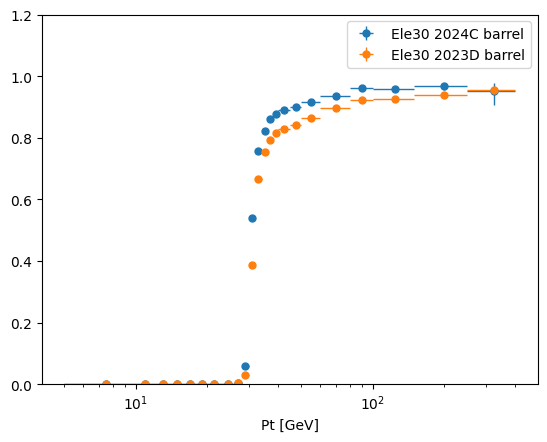

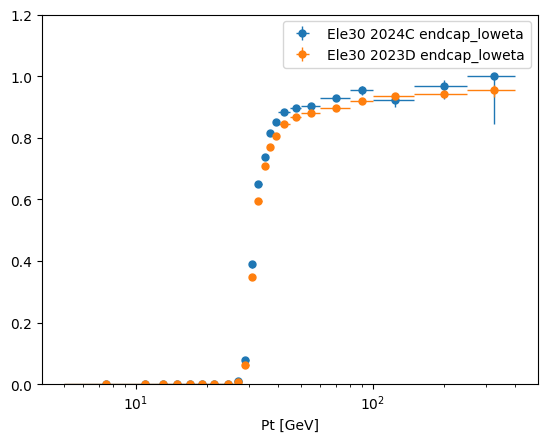

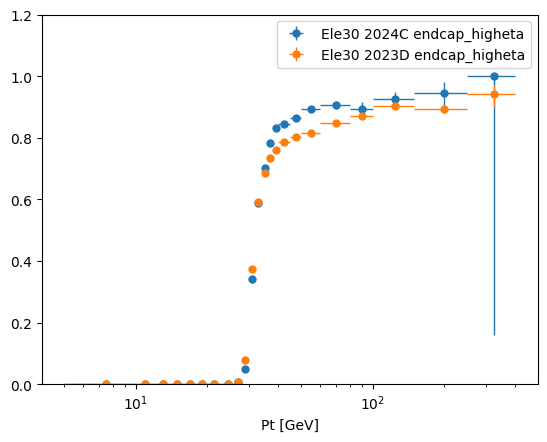

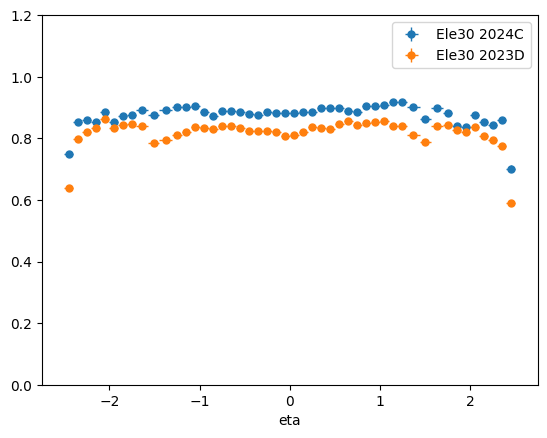

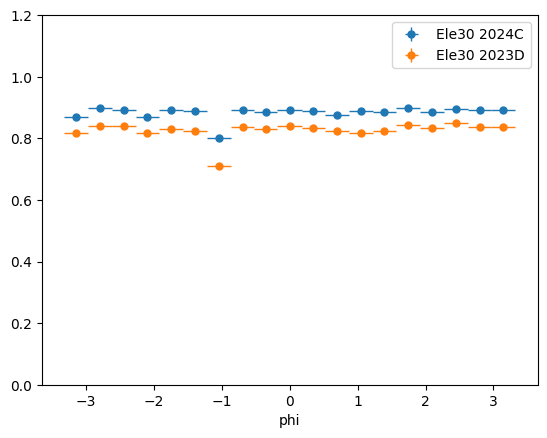

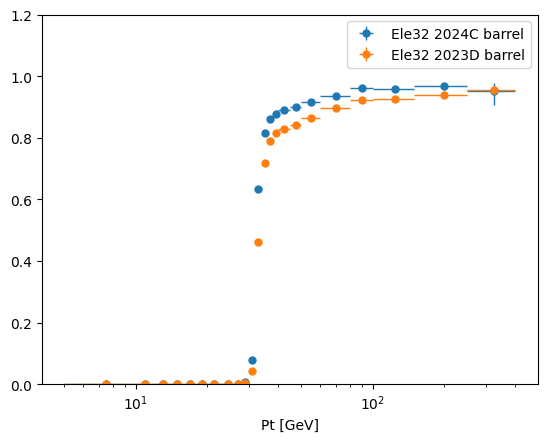

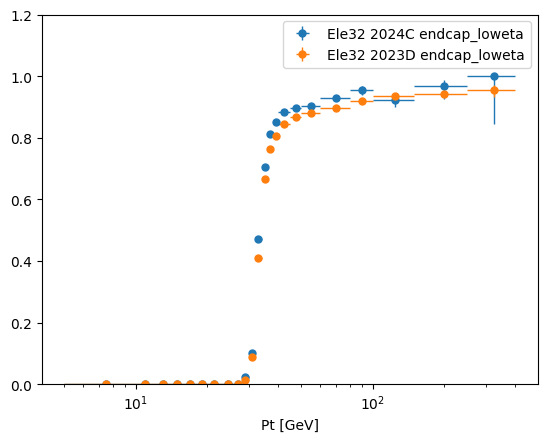

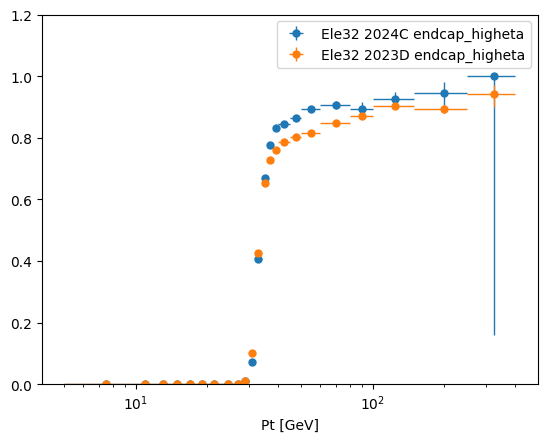

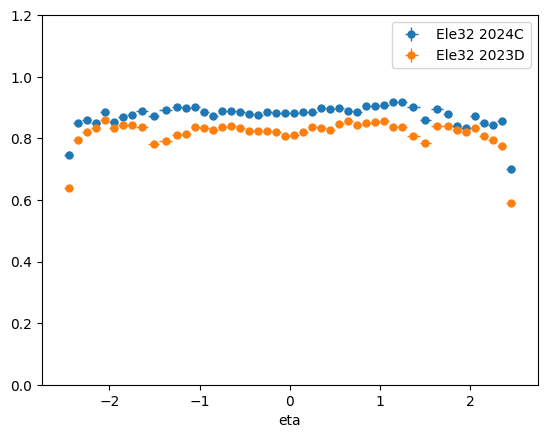

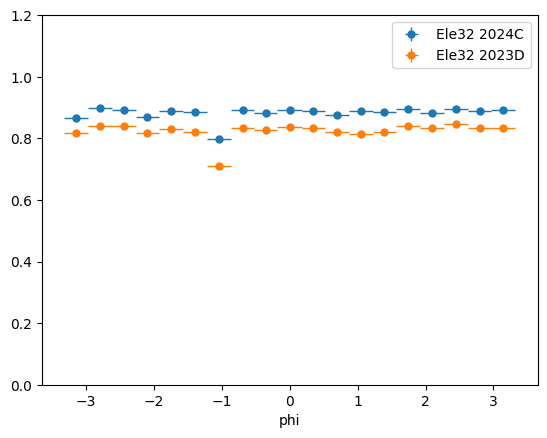

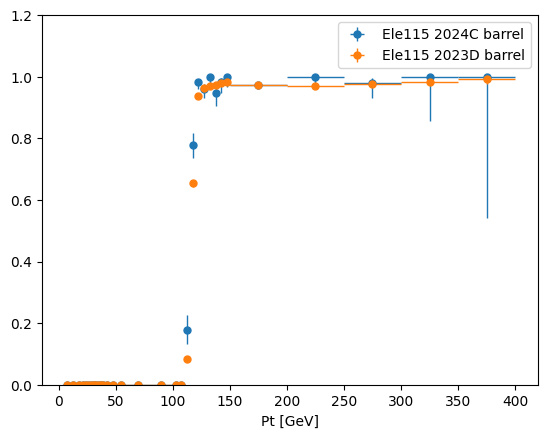

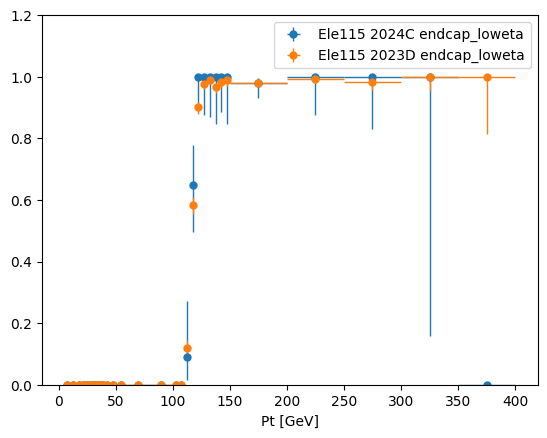

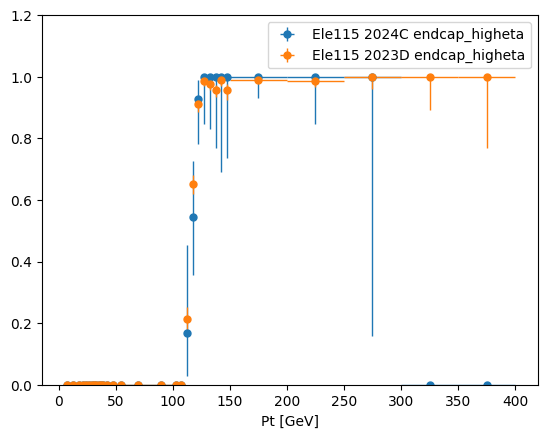

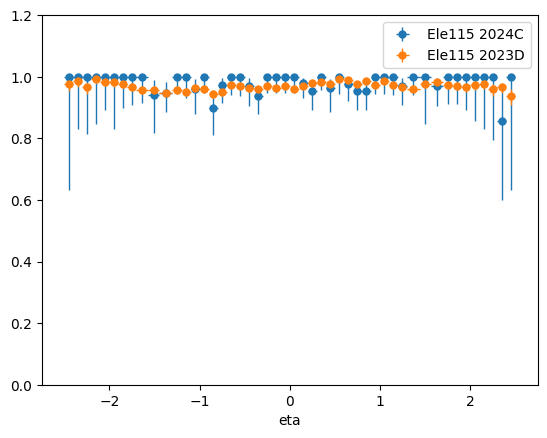

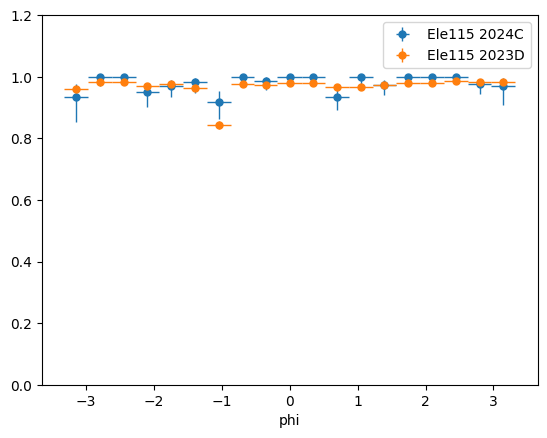

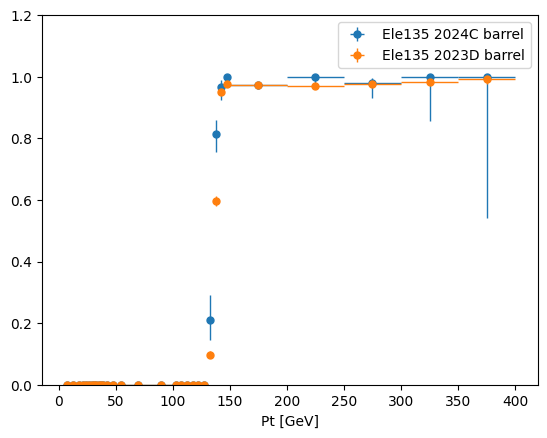

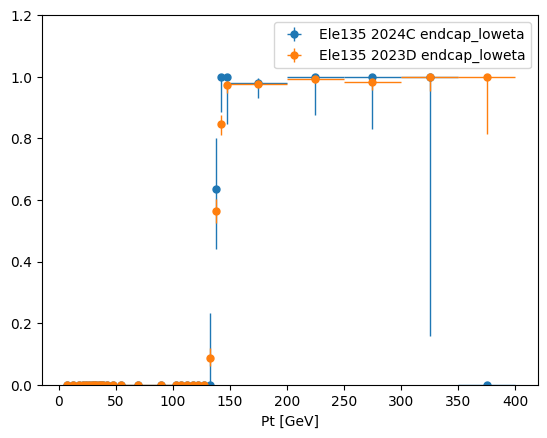

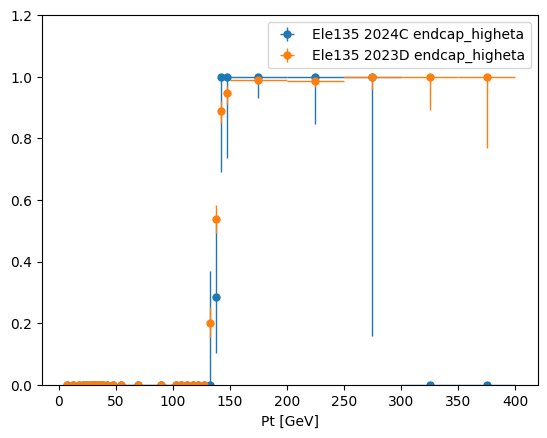

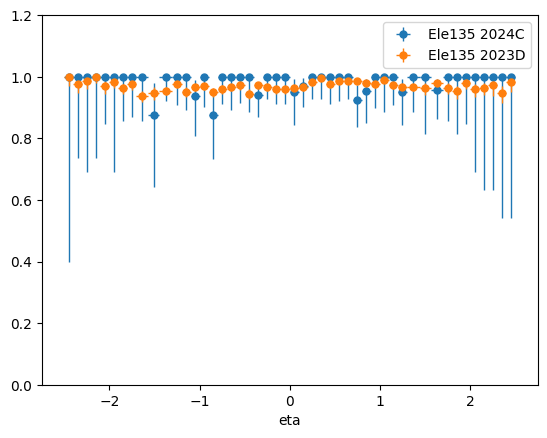

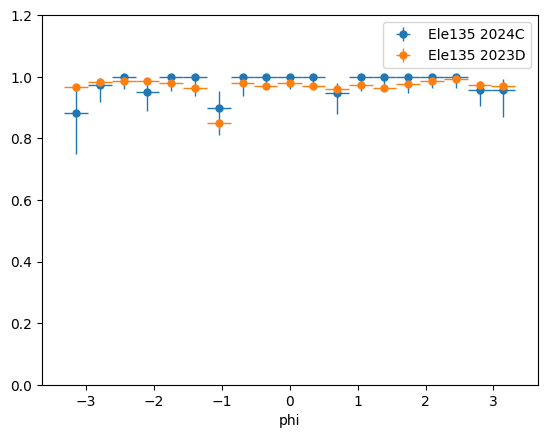

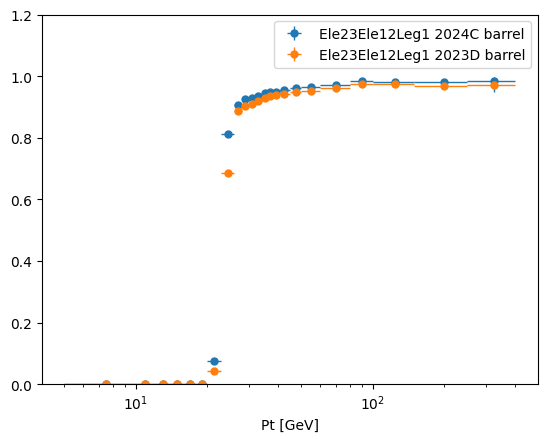

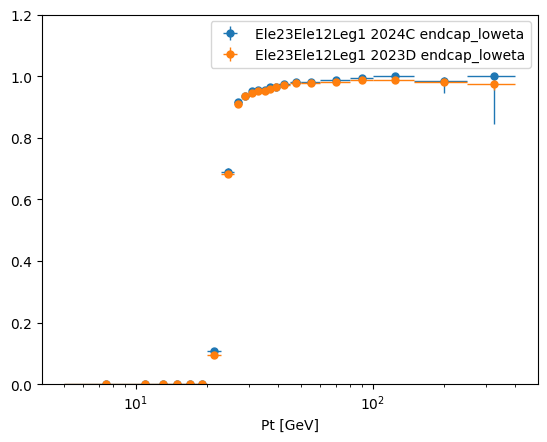

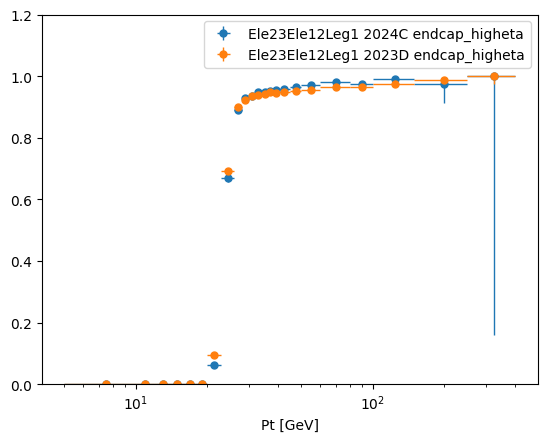

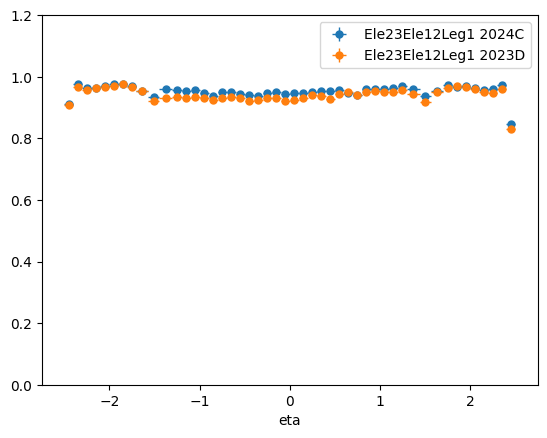

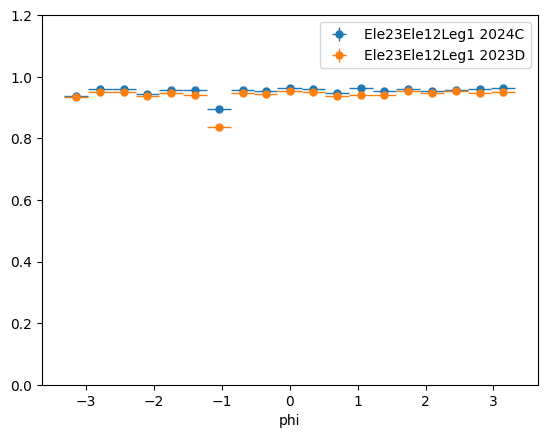

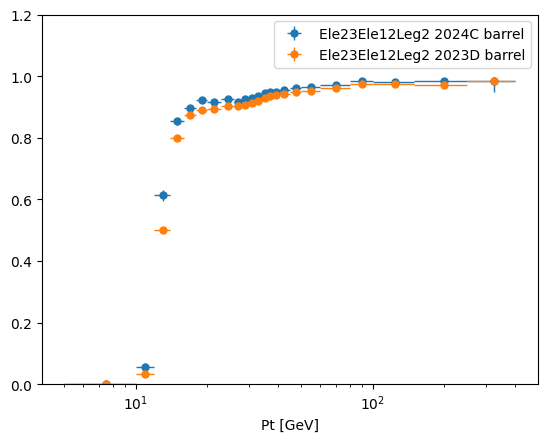

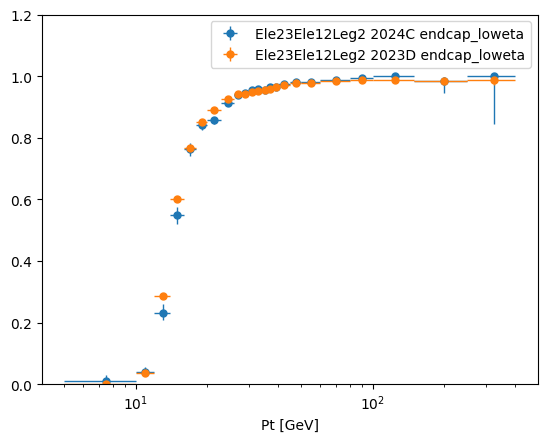

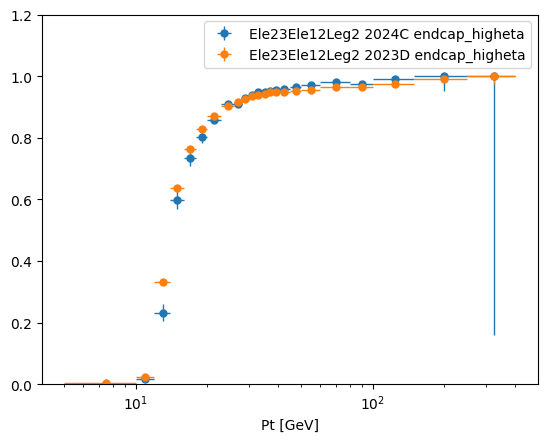

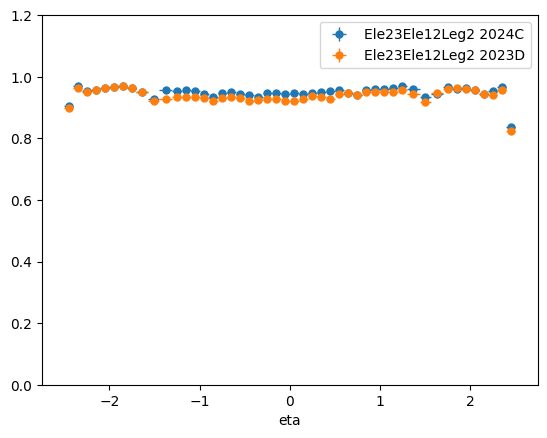

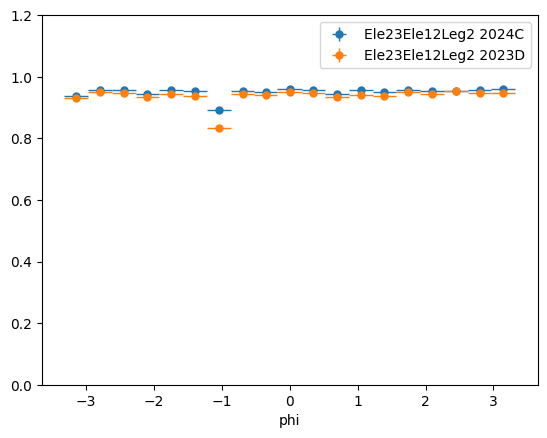

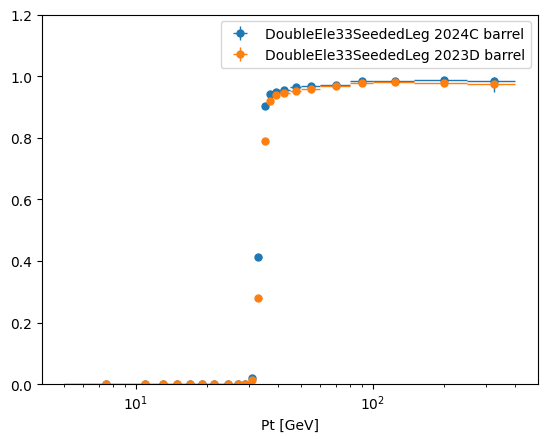

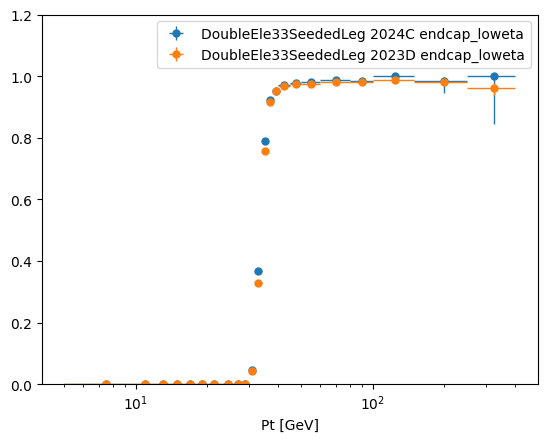

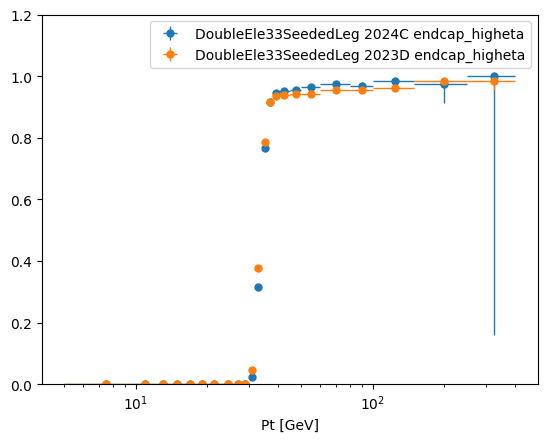

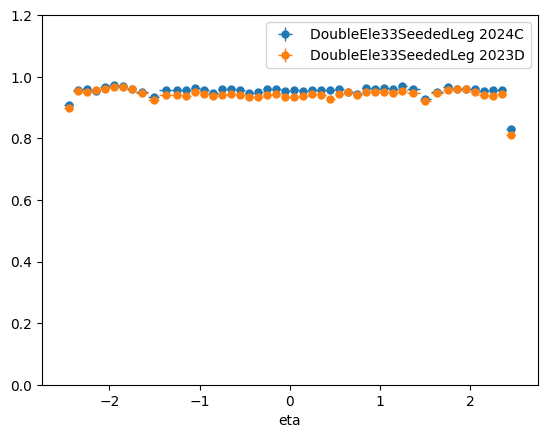

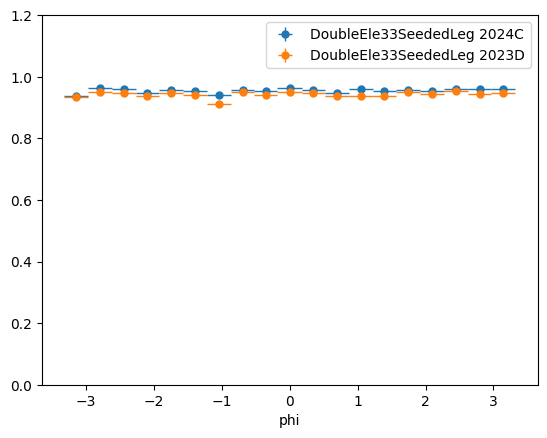

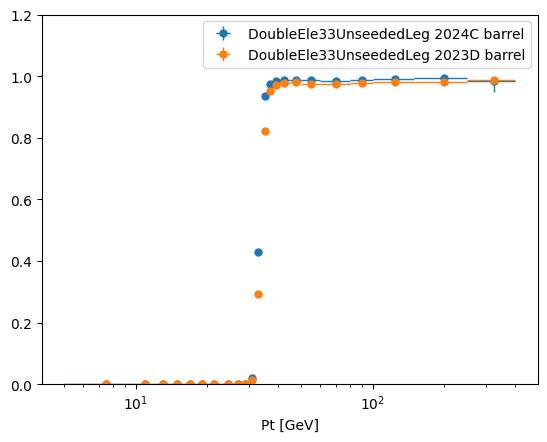

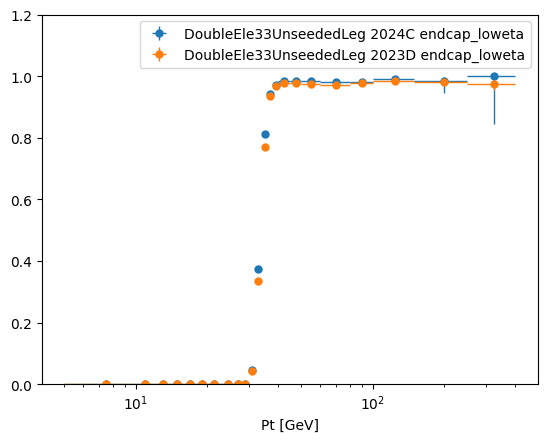

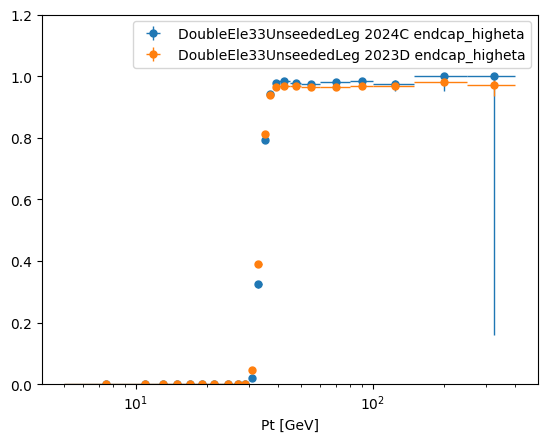

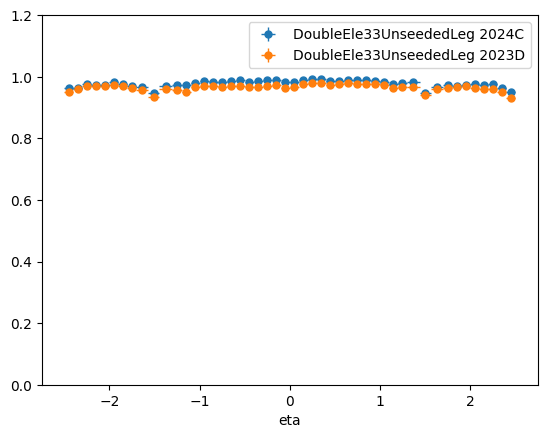

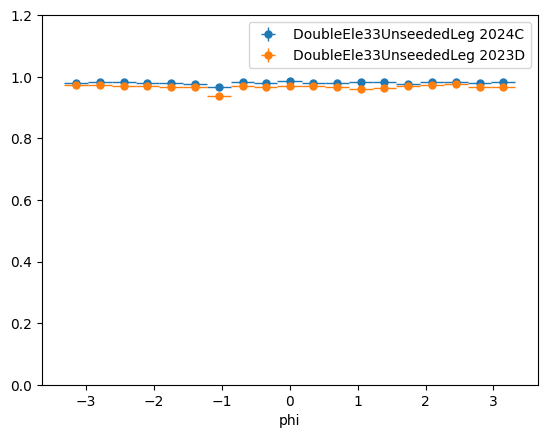

In [7]:
for trigger in list(plateau_cuts.keys()):
    plot_efficiency(
        out[trigger][0]["Run2024C"]["pt"]["barrel"]["passing"], out[trigger][0]["Run2024C"]["pt"]["barrel"]["failing"], label=trigger + " 2024C barrel"
    )

    plot_efficiency(
        out[trigger][0]["Run2023D"]["pt"]["barrel"]["passing"], out[trigger][0]["Run2023D"]["pt"]["barrel"]["failing"], label=trigger + " 2023D barrel"
    )

    if trigger != "Ele115" and trigger != "Ele135":
        plt.xscale("log")
    plt.ylim(0, 1.2)
    plt.legend()
    plt.show()

    plot_efficiency(
        out[trigger][0]["Run2024C"]["pt"]["endcap_loweta"]["passing"],
        out[trigger][0]["Run2024C"]["pt"]["endcap_loweta"]["failing"],
        label=trigger + " 2024C endcap_loweta",
    )

    plot_efficiency(
        out[trigger][0]["Run2023D"]["pt"]["endcap_loweta"]["passing"],
        out[trigger][0]["Run2023D"]["pt"]["endcap_loweta"]["failing"],
        label=trigger + " 2023D endcap_loweta",
    )

    if trigger != "Ele115" and trigger != "Ele135":
        plt.xscale("log")
    plt.ylim(0, 1.2)
    plt.legend()
    plt.show()

    plot_efficiency(
        out[trigger][0]["Run2024C"]["pt"]["endcap_higheta"]["passing"],
        out[trigger][0]["Run2024C"]["pt"]["endcap_higheta"]["failing"],
        label=trigger + " 2024C endcap_higheta",
    )

    plot_efficiency(
        out[trigger][0]["Run2023D"]["pt"]["endcap_higheta"]["passing"],
        out[trigger][0]["Run2023D"]["pt"]["endcap_higheta"]["failing"],
        label=trigger + " 2023D endcap_higheta",
    )

    if trigger != "Ele115" and trigger != "Ele135":
        plt.xscale("log")
    plt.ylim(0, 1.2)
    plt.legend()
    plt.show()

    plot_efficiency(out[trigger][0]["Run2024C"]["eta"]["entire"]["passing"], out[trigger][0]["Run2024C"]["eta"]["entire"]["failing"], label=trigger + " 2024C")

    plot_efficiency(out[trigger][0]["Run2023D"]["eta"]["entire"]["passing"], out[trigger][0]["Run2023D"]["eta"]["entire"]["failing"], label=trigger + " 2023D")

    plt.ylim(0, 1.2)
    plt.legend()
    plt.show()

    plot_efficiency(out[trigger][0]["Run2024C"]["phi"]["entire"]["passing"], out[trigger][0]["Run2024C"]["phi"]["entire"]["failing"], label=trigger + " 2024C")

    plot_efficiency(out[trigger][0]["Run2023D"]["phi"]["entire"]["passing"], out[trigger][0]["Run2023D"]["phi"]["entire"]["failing"], label=trigger + " 2023D")

    plt.ylim(0, 1.2)
    plt.legend()
    plt.show()